时间= 0    声音= 1003.4768126831904
时间= 1    声音= 1037.0779477820568
时间= 2    声音= 1038.713082912956
时间= 3    声音= 1000.5632293495951
时间= 4    声音= 997.7752232401947
时间= 5    声音= 1010.6992689951342
时间= 6    声音= 950.3761427595165
时间= 7    声音= 1019.5479894750597
时间= 8    声音= 1003.3003671196292
时间= 9    声音= 955.5669693790053
时间= 10    声音= 1024.9689279221075
时间= 11    声音= 1014.1260219584367
时间= 12    声音= 1037.3725532625947
时间= 13    声音= 1019.4002087726851
时间= 14    声音= 1036.0759553641908
时间= 15    声音= 1038.2290331070349
时间= 16    声音= 906.3531574483826
时间= 17    声音= 1037.4553836574742
时间= 18    声音= 873.5140338903761
时间= 19    声音= 1031.3580143982265
时间= 20    声音= 1041.6694171414688
时间= 21    声音= 996.4985071634743
时间= 22    声音= 1044.0367311773534
时间= 23    声音= 1026.0
时间= 24    声音= 1020.8439041023265
时间= 25    声音= 1020.7855285318276
时间= 26    声音= 999.1339358827294
时间= 27    声音= 1007.6667802378361
时间= 28    声音= 1041.248776326146
时间= 29    声音= 1025.4126959642624
时间= 30    声音= 1029.1035632848182
时间= 31  

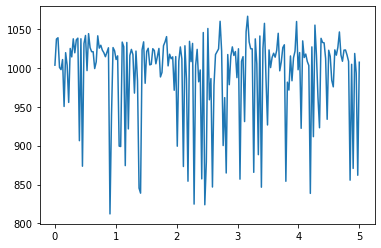

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math


def main():
    tolT = 5
    times = np.linspace(0., tolT, 200) # 产生[0,5]之间的200个等距时间间隔
    Dt = times[1] - times[0] #ppt中提到的时间间隔
    N = 5  # 体系大小，因为本着简化的原则，所以一开始只考虑5个人的小群体
    s = [0] # 储存每个Dt内的声音
    for t in range(len(times)):
        ising = get_one_sample(sizeOfSample = N, time = t, dt = Dt)
        print('时间=', t, '   声音=', ising) 
        s.append(ising)
    s.remove(0)
    plt.plot(times, s)
    plt.show()
    
def get_one_sample(sizeOfSample, time, dt): # 每个Dt内的音量
    # Dt内，初始状态{si}每个“peoon”是随机音量
    newS = 5 * np.random.random(sizeOfSample)  
    sound = 0
    # Dt内做200次循环，因为我认为我做的既然是模拟，那应该次数较多会可靠
    for i in range(200): 
        newS = sudden_silence(newS, dt)
        sound = sound + sum(newS)
    return sound

def sudden_silence(S, dt):  # 主程序 S即{si}是输入的状态
    for i in range(len(S)):
        newSound = np.random.randint(1, 5)
        # 获取该peoon受到的快乐能量
        energyBefore = getEnergy(i=i, S=S, sound=None)  
        # 获取peoon变成新音量时的受到的快乐能量
        energyLater = getEnergy(i=i, S=S, sound=newSound)  
        delta = energyLater - energyBefore  
        
        # 接受条件
        if delta < 10 * np.sqrt(dt) * np.abs(np.random.normal(size=1)): 
            S[i] = newSound   # 接受新状态
        else:
            pass  # 保持为上一个状态
    return S

def getEnergy(i, S, sound=None):  # 计算(i)位置的能量
    # 用到周期性边界条件
    N = 5
    n_left_i = i - 1 if i > 0 else N-1
    n_right_i = i + 1 if i < (N-1) else 0
    nn_left_i = i - 2 if i > 1 else i-2+N
    nn_right_i = i + 2 if i < (N-2) else i+2-N
    environment = [[n_left_i], [n_right_i], [nn_left_i], [nn_right_i]]
    energy = 0
    if sound == None:
        for num_i in range(4):
            energy += S[i] * S[environment[num_i]]
    else:
        for num_i in range(4):
            energy += sound * S[environment[num_i]]
    return energy

if __name__ == '__main__':
    main()

时间= 0    声音= 3.0
时间= 1    声音= 1.1133333333333333
时间= 2    声音= 1.4
时间= 3    声音= 1.4733333333333332
时间= 4    声音= 1.3800000000000001
时间= 5    声音= 1.54
时间= 6    声音= 1.58
时间= 7    声音= 2.1533333333333333
时间= 8    声音= 1.9933333333333334
时间= 9    声音= 2.513333333333333
时间= 10    声音= 2.486666666666667
时间= 11    声音= 2.42
时间= 12    声音= 1.1400000000000001
时间= 13    声音= 2.3066666666666666
时间= 14    声音= 2.6133333333333333
时间= 15    声音= 1.5666666666666667
时间= 16    声音= 2.1066666666666665
时间= 17    声音= 2.04
时间= 18    声音= 2.4266666666666667
时间= 19    声音= 1.3933333333333333


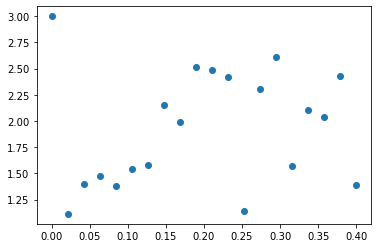

In [32]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math


def main():
    Timescale = 0.4
    times = np.linspace(0., Timescale, 20) 
    Dt = times[1] - times[0] 
    N = 5  # 体系大小，考虑10个人的群体
    totals = [0] # 储存每个Dt内的声音
    for t in range(len(times)):
        ising, newString = get_one_sample(SizeofCrowd = N, time = t, dt = t)
        print('时间=', t, '   声音=', ising) 
        totals.append(ising)
    totals.remove(0)
    plt.plot(times, totals, 'o')
    plt.show()
    
def get_one_sample(SizeofCrowd, time, dt): # 每个Dt内的音量
    # Dt内，初始状态{si}, 每个“peoon”是随机音量
    newSS = [0]
    for k in range(5):
        sss = np.random.randint(1, 5)
        newSS.append(sss)
    newSS.remove(0)
    newS = np.array(newSS)
    newsound = 0
    news = [0]  
    # Dt内做循环
    for i in range(30): 
        newS = sudden_silence(newS, dt)
        #print(newS)
        newsound = sum(newS)
        news.append(newsound)
    news.remove(0)
    sound = sum(news[-30:])/30/5
    return sound, newS

def sudden_silence(S, dt):  # S即{si}，是输入的状态
    for i in range(len(S)):
        newSound = np.random.randint(1, 5)

        energyBefore = getEnergy(i=i, S=S, sound=None)  
        energyLater = getEnergy(i=i, S=S, sound=newSound)  
        delta = energyLater - energyBefore  
        
        # 接受条件* np.abs(np.random.normal(size=1))
        if np.abs(delta) < 10 * np.sqrt(dt) * np.abs(np.random.normal(size=1)) * math.log(energyBefore/4): 
            S[i] = newSound   # 接受新状态
        else:
            pass  # 保持为上一个状态
    return S

def getEnergy(i, S, sound=None):  # 计算(i)位置的快乐能量
    N = 5
    n_left_i = i - 1 if i > 0 else N-1
    n_right_i = i + 1 if i < (N-1) else 0
    nn_left_i = i - 2 if i > 1 else i-2+N
    nn_right_i = i + 2 if i < (N-2) else i+2-N
    environment = [[n_left_i], [n_right_i], [nn_left_i], [nn_right_i]]
    energy = 0
    if sound == None:
        for num_i in range(4):
            energy += S[i] * S[environment[num_i]]
    else:
        for num_i in range(4):
            energy += sound * S[environment[num_i]]
    return energy

if __name__ == '__main__':
    main()

时间= 0    声音= 2.8
时间= 1    声音= 2.06
时间= 2    声音= 1.7466666666666666
时间= 3    声音= 1.9533333333333336
时间= 4    声音= 2.006666666666667
时间= 5    声音= 1.4666666666666666
时间= 6    声音= 2.3
时间= 7    声音= 1.1
时间= 8    声音= 1.26
时间= 9    声音= 2.46
时间= 10    声音= 1.4333333333333333
时间= 11    声音= 2.3666666666666667
时间= 12    声音= 2.38
时间= 13    声音= 2.46
时间= 14    声音= 1.3599999999999999
时间= 15    声音= 2.2066666666666666
时间= 16    声音= 1.3800000000000001
时间= 17    声音= 1.7333333333333332
时间= 18    声音= 2.413333333333333
时间= 19    声音= 2.58
时间= 20    声音= 2.3533333333333335
时间= 21    声音= 1.0933333333333333
时间= 22    声音= 2.5
时间= 23    声音= 2.04
时间= 24    声音= 1.0466666666666666
时间= 25    声音= 2.506666666666667
时间= 26    声音= 2.1866666666666665
时间= 27    声音= 2.62
时间= 28    声音= 1.5866666666666667
时间= 29    声音= 2.4533333333333336
时间= 30    声音= 1.72
时间= 31    声音= 2.2466666666666666
时间= 32    声音= 2.5266666666666664
时间= 33    声音= 2.5533333333333337
时间= 34    声音= 2.333333333333333
时间= 35    声音= 2.5466666666666664
时间= 36    声音

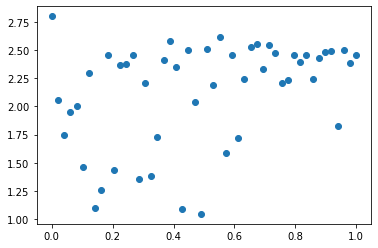

In [33]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math


def main():
    Timescale = 1
    times = np.linspace(0., Timescale, 50) 
    Dt = times[1] - times[0] 
    N = 5  # 体系大小，考虑10个人的群体
    totals = [0] # 储存每个Dt内的声音
    for t in range(len(times)):
        ising, newString = get_one_sample(SizeofCrowd = N, time = t, dt = t)
        print('时间=', t, '   声音=', ising) 
        totals.append(ising)
    totals.remove(0)
    plt.plot(times, totals, 'o')
    plt.show()
    
def get_one_sample(SizeofCrowd, time, dt): # 每个Dt内的音量
    # Dt内，初始状态{si}, 每个“peoon”是随机音量
    newSS = [0]
    for k in range(5):
        sss = np.random.randint(1, 5)
        newSS.append(sss)
    newSS.remove(0)
    newS = np.array(newSS)
    newsound = 0
    news = [0]  
    # Dt内做循环
    for i in range(30): 
        newS = sudden_silence(newS, dt)
        #print(newS)
        newsound = sum(newS)
        news.append(newsound)
    news.remove(0)
    sound = sum(news[-30:])/30/5
    return sound, newS

def sudden_silence(S, dt):  # S即{si}，是输入的状态
    for i in range(len(S)):
        newSound = np.random.randint(1, 5)

        energyBefore = getEnergy(i=i, S=S, sound=None)  
        energyLater = getEnergy(i=i, S=S, sound=newSound)  
        delta = energyLater - energyBefore  
        
        # 接受条件* np.abs(np.random.normal(size=1))
        if np.abs(delta) < 10 * np.sqrt(dt) * np.abs(np.random.normal(size=1)) * math.log(energyBefore/4): 
            S[i] = newSound   # 接受新状态
        else:
            pass  # 保持为上一个状态
    return S

def getEnergy(i, S, sound=None):  # 计算(i)位置的快乐能量
    N = 5
    n_left_i = i - 1 if i > 0 else N-1
    n_right_i = i + 1 if i < (N-1) else 0
    nn_left_i = i - 2 if i > 1 else i-2+N
    nn_right_i = i + 2 if i < (N-2) else i+2-N
    environment = [[n_left_i], [n_right_i], [nn_left_i], [nn_right_i]]
    energy = 0
    if sound == None:
        for num_i in range(4):
            energy += S[i] * S[environment[num_i]]
    else:
        for num_i in range(4):
            energy += sound * S[environment[num_i]]
    return energy

if __name__ == '__main__':
    main()

时间= 0    声音= 2.2
时间= 1    声音= 1.9600000000000002
时间= 2    声音= 1.3266666666666667
时间= 3    声音= 2.2733333333333334
时间= 4    声音= 2.3733333333333335
时间= 5    声音= 1.5533333333333332
时间= 6    声音= 1.0066666666666666
时间= 7    声音= 1.5266666666666668
时间= 8    声音= 2.1133333333333333
时间= 9    声音= 2.2800000000000002
时间= 10    声音= 2.466666666666667
时间= 11    声音= 2.2533333333333334
时间= 12    声音= 2.2133333333333334
时间= 13    声音= 1.9133333333333333
时间= 14    声音= 2.2933333333333334
时间= 15    声音= 2.1133333333333333
时间= 16    声音= 2.2866666666666666
时间= 17    声音= 2.12
时间= 18    声音= 2.2066666666666666
时间= 19    声音= 2.013333333333333
时间= 20    声音= 2.16
时间= 21    声音= 2.5466666666666664
时间= 22    声音= 2.066666666666667
时间= 23    声音= 2.3133333333333335
时间= 24    声音= 2.493333333333333
时间= 25    声音= 2.2266666666666666
时间= 26    声音= 2.4266666666666667
时间= 27    声音= 2.2133333333333334
时间= 28    声音= 1.1733333333333333
时间= 29    声音= 2.3600000000000003
时间= 30    声音= 1.6800000000000002
时间= 31    声音= 2.32
时间= 32    声音= 2

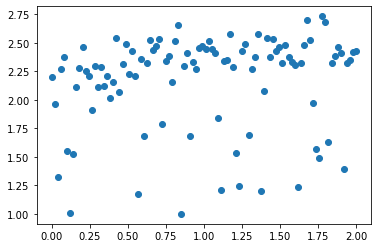

In [35]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math


def main():
    Timescale = 2
    times = np.linspace(0., Timescale, 100) 
    Dt = times[1] - times[0] 
    N = 5  # 体系大小，考虑10个人的群体
    totals = [0] # 储存每个Dt内的声音
    for t in range(len(times)):
        ising, newString = get_one_sample(SizeofCrowd = N, time = t, dt = t)
        print('时间=', t, '   声音=', ising) 
        totals.append(ising)
    totals.remove(0)
    plt.plot(times, totals, 'o')
    plt.show()
    
def get_one_sample(SizeofCrowd, time, dt): # 每个Dt内的音量
    # Dt内，初始状态{si}, 每个“peoon”是随机音量
    newSS = [0]
    for k in range(5):
        sss = np.random.randint(1, 5)
        newSS.append(sss)
    newSS.remove(0)
    newS = np.array(newSS)
    newsound = 0
    news = [0]  
    # Dt内做循环
    for i in range(30): 
        newS = sudden_silence(newS, dt)
        #print(newS)
        newsound = sum(newS)
        news.append(newsound)
    news.remove(0)
    sound = sum(news[-30:])/30/5
    return sound, newS

def sudden_silence(S, dt):  # S即{si}，是输入的状态
    for i in range(len(S)):
        newSound = np.random.randint(1, 5)

        energyBefore = getEnergy(i=i, S=S, sound=None)  
        energyLater = getEnergy(i=i, S=S, sound=newSound)  
        delta = energyLater - energyBefore  
        
        # 接受条件* np.abs(np.random.normal(size=1))
        if np.abs(delta) < 10 * np.sqrt(dt) * np.abs(np.random.normal(size=1)) * math.log(energyBefore/4): 
            S[i] = newSound   # 接受新状态
        else:
            pass  # 保持为上一个状态
    return S

def getEnergy(i, S, sound=None):  # 计算(i)位置的快乐能量
    N = 5
    n_left_i = i - 1 if i > 0 else N-1
    n_right_i = i + 1 if i < (N-1) else 0
    nn_left_i = i - 2 if i > 1 else i-2+N
    nn_right_i = i + 2 if i < (N-2) else i+2-N
    environment = [[n_left_i], [n_right_i], [nn_left_i], [nn_right_i]]
    energy = 0
    if sound == None:
        for num_i in range(4):
            energy += S[i] * S[environment[num_i]]
    else:
        for num_i in range(4):
            energy += sound * S[environment[num_i]]
    return energy

if __name__ == '__main__':
    main()

时间= 0    声音= 3.3
时间= 1    声音= 1.0
时间= 2    声音= 1.69
时间= 3    声音= 2.08
时间= 4    声音= 1.7133333333333334
时间= 5    声音= 1.6133333333333333
时间= 6    声音= 2.12
时间= 7    声音= 2.07
时间= 8    声音= 1.0
时间= 9    声音= 2.3833333333333333
时间= 10    声音= 2.4033333333333333
时间= 11    声音= 2.04
时间= 12    声音= 2.46
时间= 13    声音= 2.316666666666667
时间= 14    声音= 2.48
时间= 15    声音= 2.1966666666666663
时间= 16    声音= 2.1366666666666667
时间= 17    声音= 1.0
时间= 18    声音= 2.4433333333333334
时间= 19    声音= 2.5100000000000002


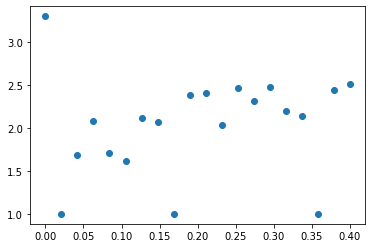

In [37]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math


def main():
    Timescale = 0.4
    times = np.linspace(0., Timescale, 20) 
    Dt = times[1] - times[0] 
    N = 10  # 体系大小，考虑10个人的群体
    totals = [0] # 储存每个Dt内的声音
    for t in range(len(times)):
        ising, newString = get_one_sample(SizeofCrowd = N, time = t, dt = t)
        print('时间=', t, '   声音=', ising) 
        totals.append(ising)
    totals.remove(0)
    plt.plot(times, totals, 'o')
    plt.show()
    
def get_one_sample(SizeofCrowd, time, dt): # 每个Dt内的音量
    # Dt内，初始状态{si}, 每个“peoon”是随机音量
    newSS = [0]
    for k in range(10):
        sss = np.random.randint(1, 5)
        newSS.append(sss)
    newSS.remove(0)
    newS = np.array(newSS)
    newsound = 0
    news = [0]  
    # Dt内做循环
    for i in range(60): 
        newS = sudden_silence(newS, dt)
        #print(newS)
        newsound = sum(newS)
        news.append(newsound)
    news.remove(0)
    sound = sum(news[-30:])/30/10
    return sound, newS

def sudden_silence(S, dt):  # S即{si}，是输入的状态
    for i in range(len(S)):
        newSound = np.random.randint(1, 5)

        energyBefore = getEnergy(i=i, S=S, sound=None)  
        energyLater = getEnergy(i=i, S=S, sound=newSound)  
        delta = energyLater - energyBefore  
        
        # 接受条件* np.abs(np.random.normal(size=1))
        if np.abs(delta) < 10 * np.sqrt(dt) * np.abs(np.random.normal(size=1)) * math.log(energyBefore/4): 
            S[i] = newSound   # 接受新状态
        else:
            pass  # 保持为上一个状态
    return S

def getEnergy(i, S, sound=None):  # 计算(i)位置的快乐能量
    N = 10
    n_left_i = i - 1 if i > 0 else N-1
    n_right_i = i + 1 if i < (N-1) else 0
    nn_left_i = i - 2 if i > 1 else i-2+N
    nn_right_i = i + 2 if i < (N-2) else i+2-N
    environment = [[n_left_i], [n_right_i], [nn_left_i], [nn_right_i]]
    energy = 0
    if sound == None:
        for num_i in range(4):
            energy += S[i] * S[environment[num_i]]
    else:
        for num_i in range(4):
            energy += sound * S[environment[num_i]]
    return energy

if __name__ == '__main__':
    main()

时间= 0    声音= 1.0
时间= 1    声音= 1.0
时间= 2    声音= 1.0
时间= 3    声音= 1.0
时间= 4    声音= 1.0
时间= 5    声音= 1.2833333333333334
时间= 6    声音= 1.4166666666666665
时间= 7    声音= 1.58
时间= 8    声音= 1.6033333333333335
时间= 9    声音= 1.6300000000000001
时间= 10    声音= 1.6666666666666667
时间= 11    声音= 1.8033333333333335
时间= 12    声音= 1.8333333333333333
时间= 13    声音= 1.8633333333333333
时间= 14    声音= 1.8399999999999999
时间= 15    声音= 1.9766666666666666
时间= 16    声音= 1.9733333333333334
时间= 17    声音= 2.16
时间= 18    声音= 2.06
时间= 19    声音= 2.2199999999999998
时间= 20    声音= 2.1399999999999997
时间= 21    声音= 2.2533333333333334
时间= 22    声音= 2.21
时间= 23    声音= 2.2399999999999998
时间= 24    声音= 2.2333333333333334
时间= 25    声音= 2.243333333333333
时间= 26    声音= 2.3733333333333335
时间= 27    声音= 2.2533333333333334
时间= 28    声音= 2.3833333333333333
时间= 29    声音= 2.27
时间= 30    声音= 2.37
时间= 31    声音= 2.3733333333333335
时间= 32    声音= 2.42
时间= 33    声音= 2.4466666666666663
时间= 34    声音= 2.4633333333333334
时间= 35    声音= 2.4033333333333

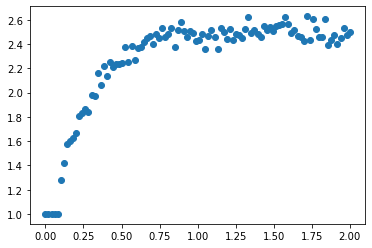

In [52]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math


def main():
    Timescale = 2
    times = np.linspace(0., Timescale, 100) 
    Dt = times[1] - times[0] 
    N = 10  # 体系大小，考虑10个人的群体
    totals = [0] # 储存每个Dt内的声音
    for t in range(len(times)):
        ising, newString = get_one_sample(SizeofCrowd = N, time = t, dt = t)
        print('时间=', t, '   声音=', ising) 
        totals.append(ising)
    totals.remove(0)
    plt.plot(times, totals, 'o')
    plt.show()
    
def get_one_sample(SizeofCrowd, time, dt): # 每个Dt内的音量
    # Dt内，初始状态{si}, 每个“peoon”是随机音量
    newSS = [0]
    for k in range(10):
        sss = np.random.randint(1, 5)
        newSS.append(sss)
    newSS.remove(0)
    newS = np.array(newSS)
    newsound = 0
    news = [0]  
    # Dt内做循环
    for i in range(60): 
        newS = sudden_silence(newS, dt)
        #print(newS)
        newsound = sum(newS)
        news.append(newsound)
    news.remove(0)
    sound = sum(news[-30:])/30/10
    return sound, newS

def sudden_silence(S, dt):  # S即{si}，是输入的状态
    for i in range(len(S)):
        newSound = np.random.randint(1, 5)

        energyBefore = getEnergy(i=i, S=S, sound=None)  
        energyLater = getEnergy(i=i, S=S, sound=newSound)  
        delta = energyLater - energyBefore  
        
        # 接受条件* np.abs(np.random.normal(size=1))
        if delta < dt: 
            S[i] = newSound   # 接受新状态
        else:
            pass  # 保持为上一个状态
    return S

def getEnergy(i, S, sound=None):  # 计算(i)位置的快乐能量
    N = 10
    n_left_i = i - 1 if i > 0 else N-1
    n_right_i = i + 1 if i < (N-1) else 0
    nn_left_i = i - 2 if i > 1 else i-2+N
    nn_right_i = i + 2 if i < (N-2) else i+2-N
    environment = [[n_left_i], [n_right_i], [nn_left_i], [nn_right_i]]
    energy = 0
    if sound == None:
        for num_i in range(4):
            energy += S[i] * S[environment[num_i]]
    else:
        for num_i in range(4):
            energy += sound * S[environment[num_i]]
    return energy

if __name__ == '__main__':
    main()